In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

%run db_connection.ipynb

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [279]:
df = pd.read_sql(sql_query, con= engine)

In [5]:
df.shape

(150001, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [24]:
df.isnull().sum().sum()

1031392

In [25]:
df.isnull().sum().sort_values(ascending=False)

Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec with 125000B < Vol DL              97538
TCP UL Retrans. Vol (Bytes)                  96649
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 6250B < Vol DL < 31250B       88317
TCP DL Retrans. Vol (Bytes)                  88146
HTTP UL (Bytes)                              81810
HTTP DL (Bytes)                              81474
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Last Location Name                            1153
MSISDN/Number                                 1066
Bearer Id                                      991
Nb of sec with Vol UL < 1250B                  793
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [81]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):
    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The telecom dataset contains 12.5 % missing values.


In [82]:
# Total null values in percentage for telecom dataset (%)
df.isnull().sum().sort_values(ascending=False)/150001*100

Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Last Location Name                           0.768662
MSISDN/Number                                0.710662
Bearer Id                                    0.660662
Nb of sec with Vol UL < 1250B                0.528663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%)                0.527996
50 Kbps < UL TP < 300 Kbps (

In [146]:
# fill missing with ffill method for columns
def fix_missing_bymode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

In [280]:
df_clean['Start'] = fix_missing_bymode(df, 'Start')
df_clean['End '] = fix_missing_bymode(df, 'End')
df_clean['Last Location Name'] = fix_missing_bymode(df, 'Last Location Name')
df_clean['Handset Manufacturer'] = fix_missing_bymode(df, 'Handset Manufacturer')
df_clean['Handset Type'] = fix_missing_bymode(df, 'Handset Type')

In [302]:
# Filling all float datatype columns using forward fill method
df_clean.fillna(method='ffill', inplace=True)

In [295]:
df_clean2 = df
df_clean2.fillna(method='ffill', inplace=True)

In [304]:
df_clean.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       7
TCP UL Retrans. Vol (Bytes)       9
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [283]:
# drop columns with more than 30% missing values
df_clean = df.drop(['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 
                    'Nb of sec with 125000B < Vol DL', 
                    'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 6250B < Vol DL < 31250B',
                    'HTTP UL (Bytes)','HTTP DL (Bytes)'], axis=1)
df_clean.shape

(150001, 47)

In [102]:
selected_numeric_vars = [
    'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
    'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

In [ ]:
lami - check this line
sns.pairplot(df[selected_numeric_vars])
plt.suptitle('Pair Plot of Selected Numeric Variables', y=1.02)
plt.show()
print("This takes too much time")

In [ ]:
lami - check this line
# Correlation heatmap for selected numeric variables
correlation_matrix = df[selected_numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Numeric Variables')
plt.show()

# Identifying the top 10 handsets used by the customers

In [91]:
df_headset_type = df_clean['Handset Type'].value_counts(ascending=False)
df_headset_type.iloc[:10]

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Handset Type Widely used by user'}, xlabel='Handset Type'>

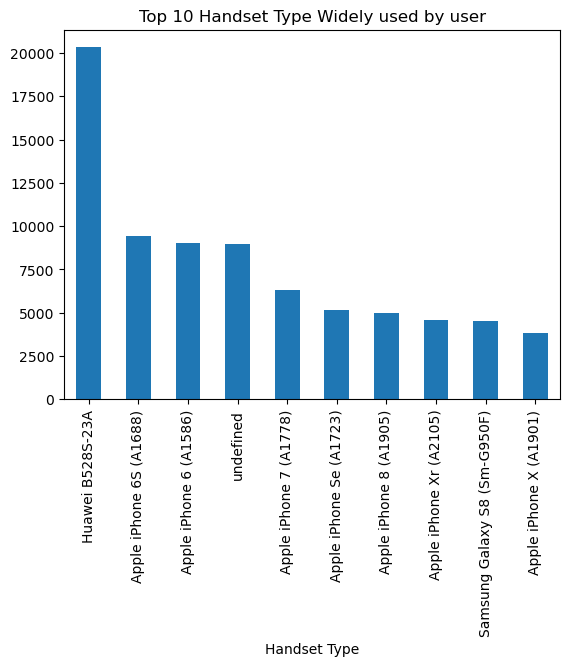

In [92]:
df_headset_type.iloc[:10].plot.bar(x="Total Handset Used", y="Handset Type", title="Top 10 Handset Type Widely used by user")

# Identifying the top 3 handset manufacturers

In [93]:
df_headset_m = df_clean['Handset Manufacturer'].value_counts(ascending=False)
df_headset_m.iloc[:3]

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 3 Handset used by Manufacturer')

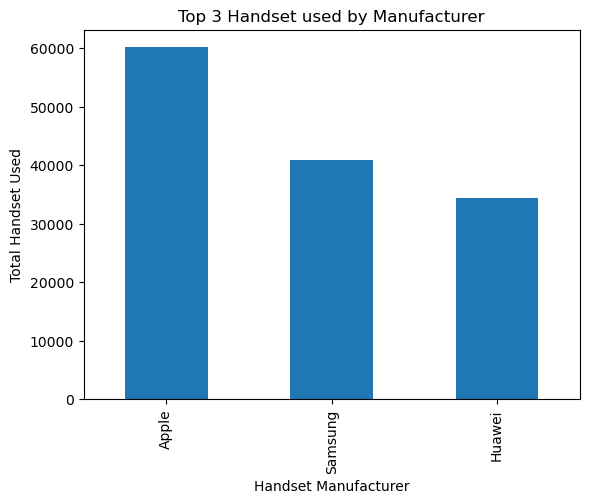

In [94]:
df_headset_m.iloc[:3].plot(kind="bar")
plt.xlabel("Handset Manufacturer")
plt.ylabel("Total Handset Used")
plt.title("Top 3 Handset used by Manufacturer")

# Identifying the top 5 handsets per top 3 handset manufacturer

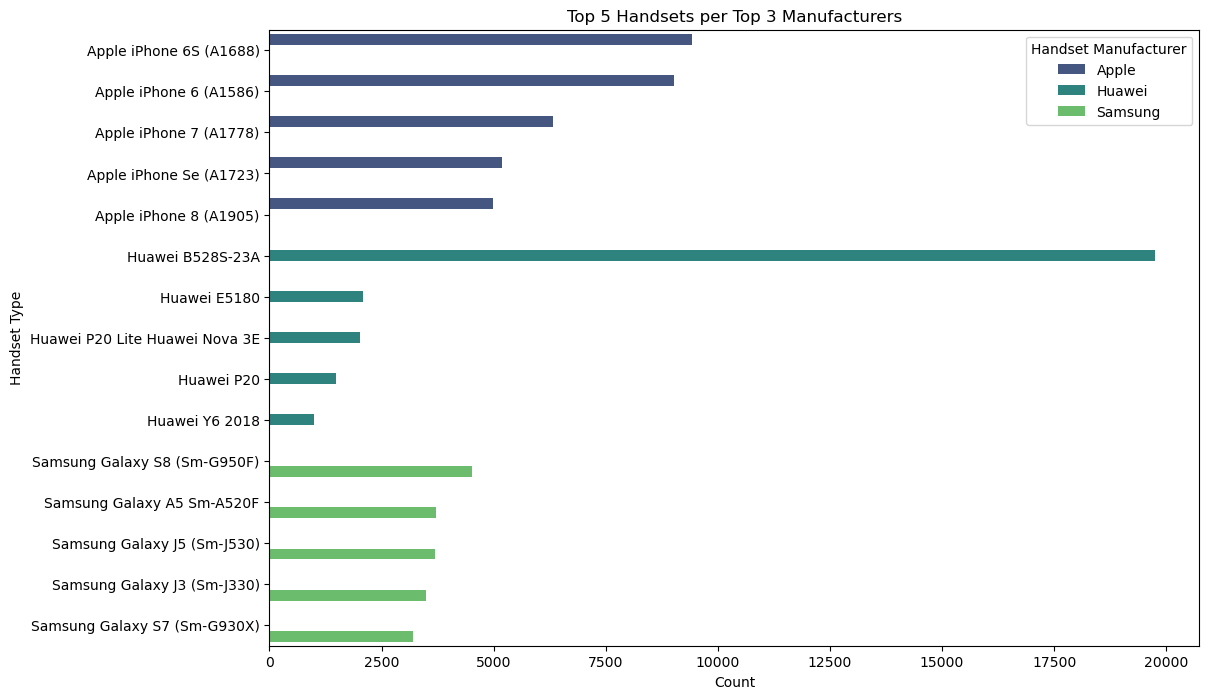

In [95]:
# Create a new DataFrame with 'Handset Manufacturer' and 'Handset Type' columns
handset_df = df_clean[['Handset Manufacturer', 'Handset Type']]

# Group by 'Handset Manufacturer' and 'Handset Type' to count the occurrences
manufacturer_handset_counts = handset_df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count')

# Get the top 3 manufacturers based on the total count of handsets
top_3_manufacturers = manufacturer_handset_counts.groupby('Handset Manufacturer')['Count'].sum().nlargest(3).index

# Filter the DataFrame to include only the top 3 manufacturers
top_3_manufacturer_handsets = manufacturer_handset_counts[manufacturer_handset_counts['Handset Manufacturer'].isin(top_3_manufacturers)]

# Get the top 5 handsets for each top manufacturer
top_5_handsets_per_manufacturer = top_3_manufacturer_handsets.groupby('Handset Manufacturer').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Plot the top 5 handsets per top 3 manufacturers
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Handset Type', hue='Handset Manufacturer', data=top_5_handsets_per_manufacturer, palette='viridis')
plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()

# Task 2.1 Aggregate information per user

In [97]:
user_aggregated = df_clean.groupby('MSISDN/Number').agg({
    'MSISDN/Number': 'count',                    # Number of xDR sessions
    'Dur. (ms).1': 'sum',                    # Session duration
    'Total DL (Bytes)': 'sum',               # Total download data
    'Total UL (Bytes)': 'sum',               # Total upload data
    'Social Media DL (Bytes)': 'sum',        # Total social media download data
    'Social Media UL (Bytes)': 'sum',        # Total social media upload data
    'Google DL (Bytes)': 'sum',              # Total Google download data
    'Google UL (Bytes)': 'sum',              # Total Google upload data
    'Email DL (Bytes)': 'sum',               # Total email download data
    'Email UL (Bytes)': 'sum',               # Total email upload data
    'Youtube DL (Bytes)': 'sum',             # Total YouTube download data
    'Youtube UL (Bytes)': 'sum',             # Total YouTube upload data
    'Netflix DL (Bytes)': 'sum',             # Total Netflix download data
    'Netflix UL (Bytes)': 'sum',             # Total Netflix upload data
    'Gaming DL (Bytes)': 'sum',              # Total gaming download data
    'Gaming UL (Bytes)': 'sum',              # Total gaming upload data
    'Other DL (Bytes)': 'sum',               # Total other download data
    'Other UL (Bytes)': 'sum'                # Total other upload data
})

# Rename columns for clarity
user_aggregated = user_aggregated.rename(columns={
    'MSISDN/Number': 'Number_of_xDR_sessions',
    'Dur. (ms).1': 'Session_duration',
    'Total DL (Bytes)': 'Total_DL_data',
    'Total UL (Bytes)': 'Total_UL_data',
    'Social Media DL (Bytes)': 'Social_Media_DL_data',
    'Social Media UL (Bytes)': 'Social_Media_UL_data',
    'Google DL (Bytes)': 'Google_DL_data',
    'Google UL (Bytes)': 'Google_UL_data',
    'Email DL (Bytes)': 'Email_DL_data',
    'Email UL (Bytes)': 'Email_UL_data',
    'Youtube DL (Bytes)': 'Youtube_DL_data',
    'Youtube UL (Bytes)': 'Youtube_UL_data',
    'Netflix DL (Bytes)': 'Netflix_DL_data',
    'Netflix UL (Bytes)': 'Netflix_UL_data',
    'Gaming DL (Bytes)': 'Gaming_DL_data',
    'Gaming UL (Bytes)': 'Gaming_UL_data',
    'Other DL (Bytes)': 'Other_DL_data',
    'Other UL (Bytes)': 'Other_UL_data'
})

# Display the aggregated information per user
user_aggregated.sort_values(by="Number_of_xDR_sessions", ascending=False).head()

Number_of_xDR_sessions  Session_duration  Total_DL_data  \
MSISDN/Number                                                            
3.362632e+10                       18      8.791937e+09   7.301517e+09   
3.362578e+10                       17      1.855376e+10   7.770043e+09   
3.361489e+10                       17      9.966906e+09   8.156743e+09   
3.365973e+10                       16      4.035436e+09   7.081602e+09   
3.376054e+10                       15      9.279442e+09   7.811295e+09   

               Total_UL_data  Social_Media_DL_data  Social_Media_UL_data  \
MSISDN/Number                                                              
3.362632e+10     669650721.0            42743837.0              630942.0   
3.362578e+10     729577380.0            26564121.0              571379.0   
3.361489e+10     689483001.0            27749744.0              544800.0   
3.365973e+10     624260321.0            34900444.0              511914.0   
3.376054e+10     703478581.0            39297646.0              485543.0   

               Google_DL_data  Google_UL_data  Email_DL_data  Email_UL_data  \
MSISDN/Number                                                                 
3.362632e+10      116106455.0      36085397.0     33404785.0      9013997.0   
3.362578e+10      107904739.0      34403176.0     31895412.0      8738554.0   
3.361489e+10       93941708.0      34032079.0     33607211.0      7181423.0   
3.365973e+10       90958549.0      25557796.0     29907647.0      6092145.0   
3.376054e+10       88626532.0      34596567.0     26437895.0      7255872.0   

               Youtube_DL_data  Youtube_UL_data  Netflix_DL_data  \
MSISDN/Number                                                      
3.362632e+10       164048706.0      210434341.0      199479238.0   
3.362578e+10       237883033.0      215075736.0      193912238.0   
3.361489e+10       199823443.0      194546775.0      179585986.0   
3.365973e+10       119658146.0      138332942.0      196277206.0   
3.376054e+10       194068298.0      202220900.0      146500839.0   

               Netflix_UL_data  Gaming_DL_data  Gaming_UL_data  Other_DL_data  \
MSISDN/Number                                                                   
3.362632e+10       129246502.0    6.745734e+09     141838597.0   8.025477e+09   
3.362578e+10       163068369.0    7.171884e+09     154789688.0   6.201653e+09   
3.361489e+10       181815060.0    7.622035e+09     127396833.0   7.495298e+09   
3.365973e+10       203241873.0    6.609900e+09     115658741.0   6.182551e+09   
3.376054e+10       188142430.0    7.316364e+09     144681056.0   4.590038e+09   

               Other_UL_data  
MSISDN/Number                 
3.362632e+10     142400945.0  
3.362578e+10     152930478.0  
3.361489e+10     143966031.0  
3.365973e+10     134864910.0  
3.376054e+10     126096213.0

# Task 2.2 Aggregate information per user

In [104]:
# Users’ behavior on those applications by aggregating information's relevant columns
columns = ['Bearer Id','Dur. (ms)', 'Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)',
           'Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)',
           'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)',
           'Total UL (Bytes)','Total DL (Bytes)']
df_user_aggregation = df_clean[columns]

In [100]:
df_user_aggregation.shape

(150001, 17)

In [101]:
df_user_aggregation.describe()

Bearer Id     Dur. (ms)  Social Media DL (Bytes)  \
count  1.490100e+05  1.500000e+05             1.500010e+05   
mean   1.013887e+19  1.046086e+05             1.795322e+06   
std    2.893173e+18  8.103762e+04             1.035482e+06   
min    6.917538e+18  7.142000e+03             1.200000e+01   
25%    7.349883e+18  5.744050e+04             8.991480e+05   
50%    7.349883e+18  8.639900e+04             1.794369e+06   
75%    1.304243e+19  1.324302e+05             2.694938e+06   
max    1.318654e+19  1.859336e+06             3.586064e+06   

       Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
count            150001.000000       1.500010e+05       1.500010e+05   
mean              32928.434380       5.750753e+06       2.056542e+06   
std               19006.178256       3.309097e+06       1.189917e+06   
min                   0.000000       2.070000e+02       3.000000e+00   
25%               16448.000000       2.882393e+06       1.024279e+06   
50%               32920.000000       5.765829e+06       2.054573e+06   
75%               49334.000000       8.623552e+06       3.088454e+06   
max               65870.000000       1.146283e+07       4.121357e+06   

       Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
count      1.500010e+05     150001.000000        1.500010e+05   
mean       1.791729e+06     467373.441940        1.163407e+07   
std        1.035840e+06     269969.307031        6.710569e+06   
min        1.400000e+01          2.000000        5.300000e+01   
25%        8.927930e+05     233383.000000        5.833501e+06   
50%        1.793505e+06     466250.000000        1.161602e+07   
75%        2.689327e+06     700440.000000        1.744852e+07   
max        3.586146e+06     936418.000000        2.325910e+07   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.100941e+07        1.162685e+07        1.100175e+07   
std          6.345423e+06        6.725218e+06        6.359490e+06   
min          1.050000e+02        4.200000e+01        3.500000e+01   
25%          5.517965e+06        5.777156e+06        5.475981e+06   
50%          1.101345e+07        1.164222e+07        1.099638e+07   
75%          1.651556e+07        1.747048e+07        1.650727e+07   
max          2.201196e+07        2.325919e+07        2.201196e+07   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count       1.500010e+05       1.500010e+05      1.500010e+05   
mean        4.220447e+08       8.288398e+06      4.211005e+08   
std         2.439675e+08       4.782700e+06      2.432050e+08   
min         2.516000e+03       5.900000e+01      3.290000e+03   
25%         2.104733e+08       4.128476e+06      2.101869e+08   
50%         4.234081e+08       8.291208e+06      4.218030e+08   
75%         6.331742e+08       1.243162e+07      6.316918e+08   
max         8.434419e+08       1.655879e+07      8.434425e+08   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500000e+05      1.500000e+05  
mean       4.112121e+07      4.546434e+08  
std        1.127639e+07      2.441429e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322201e+07      2.431068e+08  
50%        4.114331e+07      4.558411e+08  
75%        4.903424e+07      6.657055e+08  
max        7.833131e+07      9.029696e+08

# Non - Graphical Univariate Analysis

In [111]:
# Filtering out quantitative variables for this analysis
# Task 2.2 Bullet 3
quantitative_variables = [
    'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
    '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
    'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
    '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
    'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total UL (Bytes)', 'Total DL (Bytes)']

# Compute dispersion parameters (mean, median, standard deviation, min, max, interquartile range)
dispersion_params = df[quantitative_variables].agg([
    'mean', 'median', 'std', 'min', 'max', lambda x: x.quantile(0.75) - x.quantile(0.25)])

# Display the results
dispersion_params

Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean      1.046086e+05       109.795706        17.662883   
median    8.639900e+04        45.000000         5.000000   
std       8.103762e+04       619.782739        84.793524   
min       7.142000e+03         0.000000         0.000000   
max       1.859336e+06     96923.000000      7120.000000   
<lambda>  7.498975e+04        38.000000        13.000000   

          Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
mean                 13300.045927              1770.428647   
median                  63.000000                63.000000   
std                  23971.878541              4625.355500   
min                      0.000000                 0.000000   
max                 378160.000000             58613.000000   
<lambda>             19667.750000              1073.000000   

          TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
mean                     2.080991e+07                 7.596587e+05   
median                   5.687300e+05                 2.094950e+04   
std                      1.825665e+08                 2.645305e+07   
min                      2.000000e+00                 1.000000e+00   
max                      4.294426e+09                 2.908226e+09   
<lambda>                 3.732657e+06                 7.932550e+04   

          DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
mean                92.844754                        3.069355   
median             100.000000                        0.000000   
std                 13.038031                        6.215233   
min                  0.000000                        0.000000   
max                100.000000                       93.000000   
<lambda>             9.000000                        4.000000   

          250 Kbps < DL TP < 1 Mbps (%)  ...  Youtube DL (Bytes)  \
mean                           1.717341  ...        1.163407e+07   
median                         0.000000  ...        1.161602e+07   
std                            4.159538  ...        6.710569e+06   
min                            0.000000  ...        5.300000e+01   
max                          100.000000  ...        2.325910e+07   
<lambda>                       1.000000  ...        1.161502e+07   

          Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
mean            1.100941e+07        1.162685e+07        1.100175e+07   
median          1.101345e+07        1.164222e+07        1.099638e+07   
std             6.345423e+06        6.725218e+06        6.359490e+06   
min             1.050000e+02        4.200000e+01        3.500000e+01   
max             2.201196e+07        2.325919e+07        2.201196e+07   
<lambda>        1.099760e+07        1.169332e+07        1.103129e+07   

          Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
mean           4.220447e+08       8.288398e+06      4.211005e+08   
median         4.234081e+08       8.291208e+06      4.218030e+08   
std            2.439675e+08       4.782700e+06      2.432050e+08   
min            2.516000e+03       5.900000e+01      3.290000e+03   
max            8.434419e+08       1.655879e+07      8.434425e+08   
<lambda>       4.227009e+08       8.303148e+06      4.215049e+08   

          Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
mean          8.264799e+06      4.112121e+07      4.546434e+08  
median        8.267071e+06      4.114331e+07      4.558411e+08  
std           4.769004e+06      1.127639e+07      2.441429e+08  
min           1.480000e+02      2.866892e+06      7.114041e+06  
max           1.655882e+07      7.833131e+07      9.029696e+08  
<lambda>      8.238205e+06      1.581223e+07      4.225987e+08  

[6 rows x 43 columns]

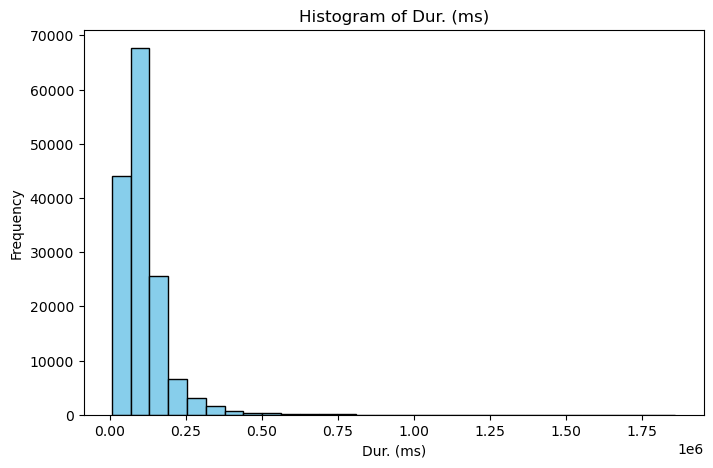

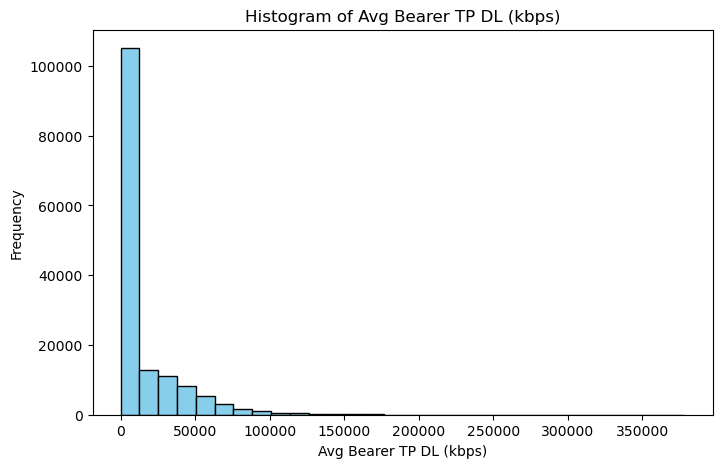

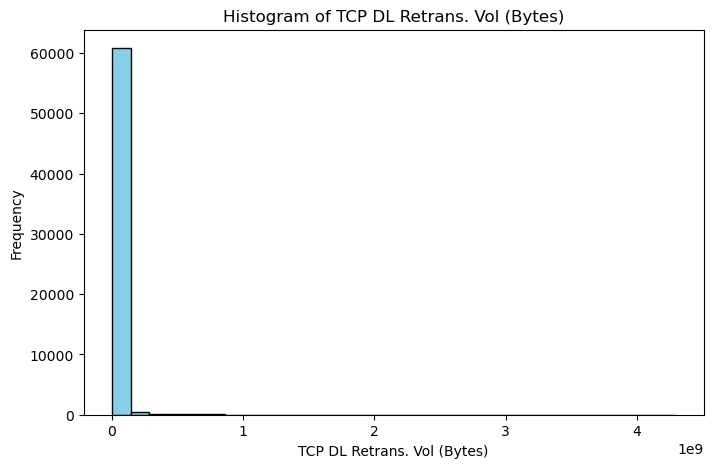

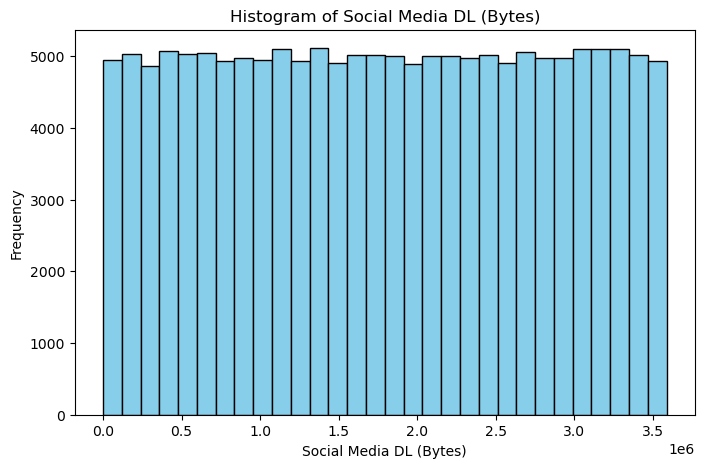

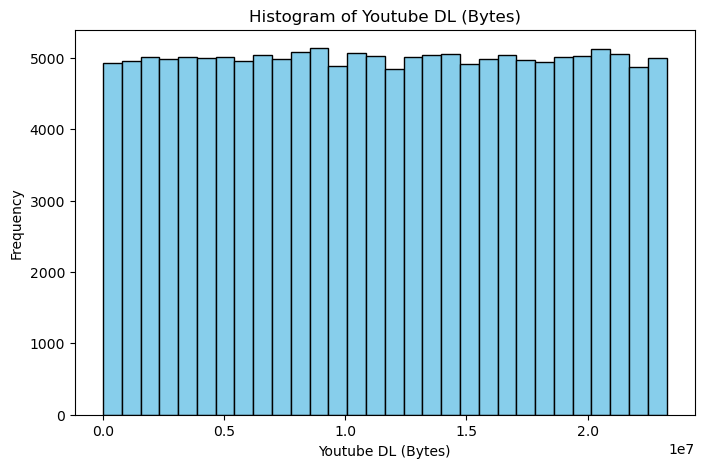

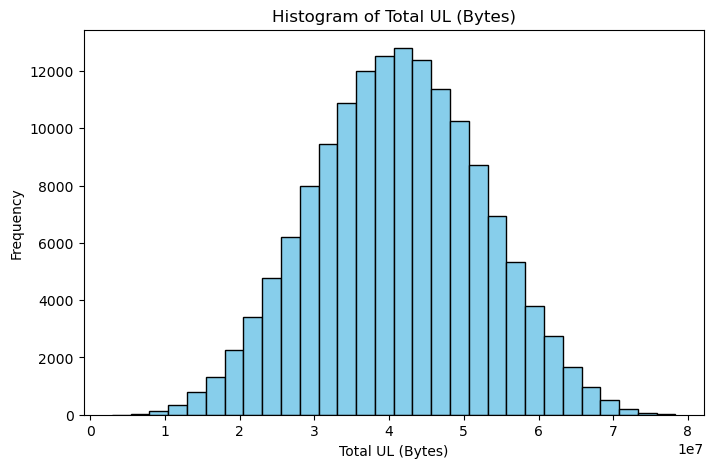

In [112]:
# Graphical Univariate Analysis: 
# Task 2.2 Bullet 4

# Plot histograms for selected quantitative variables
quantitative_variables_to_plot = ['Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
                                  'Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Total UL (Bytes)']

for variable in quantitative_variables_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(df[variable], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()



In [133]:
# Task 2.2. Bullet 5

selected_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total UL (Bytes)', 'Total DL (Bytes)'
]
selected_data = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Extract correlations with 'Total UL (Bytes)' and 'Total DL (Bytes)'
total_correlations = correlation_matrix[['Total UL (Bytes)', 'Total DL (Bytes)']]

# Print the correlations
print(total_correlations)

                         Total UL (Bytes)  Total DL (Bytes)
Social Media DL (Bytes)          0.004798          0.005164
Social Media UL (Bytes)         -0.000204          0.000206
Google DL (Bytes)               -0.001492          0.012189
Google UL (Bytes)                0.102113          0.001129
Email DL (Bytes)                -0.002346          0.004395
Email UL (Bytes)                 0.022332         -0.002516
Youtube DL (Bytes)              -0.000384          0.025685
Youtube UL (Bytes)               0.563917         -0.002301
Netflix DL (Bytes)              -0.000662          0.024386
Netflix UL (Bytes)               0.561779         -0.000979
Gaming DL (Bytes)               -0.001858          0.999131
Gaming UL (Bytes)                0.419690          0.001067
Other DL (Bytes)                -0.001921         -0.002709
Other UL (Bytes)                 0.417413         -0.001324
Total UL (Bytes)                 1.000000         -0.001895
Total DL (Bytes)                -0.00189

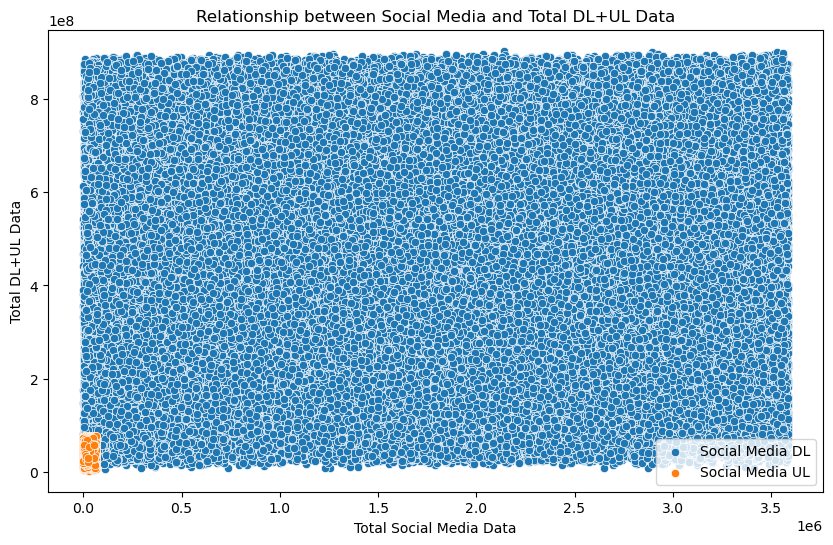

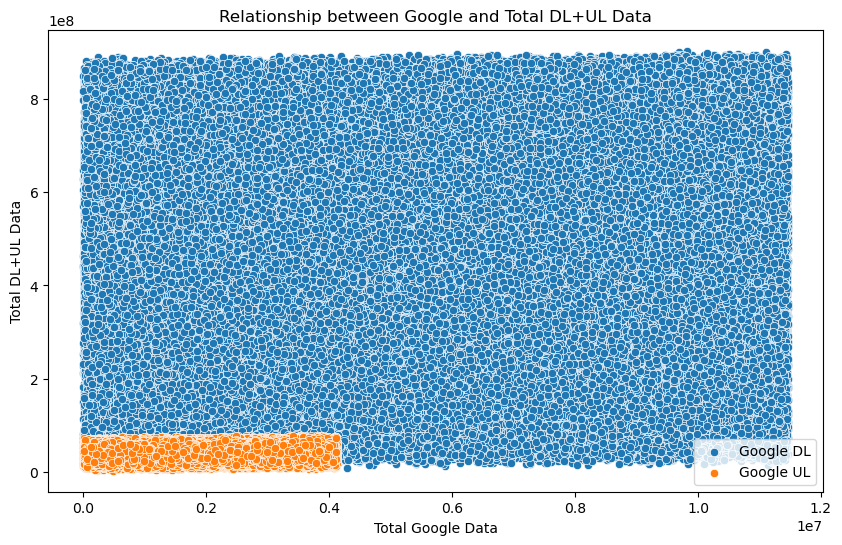

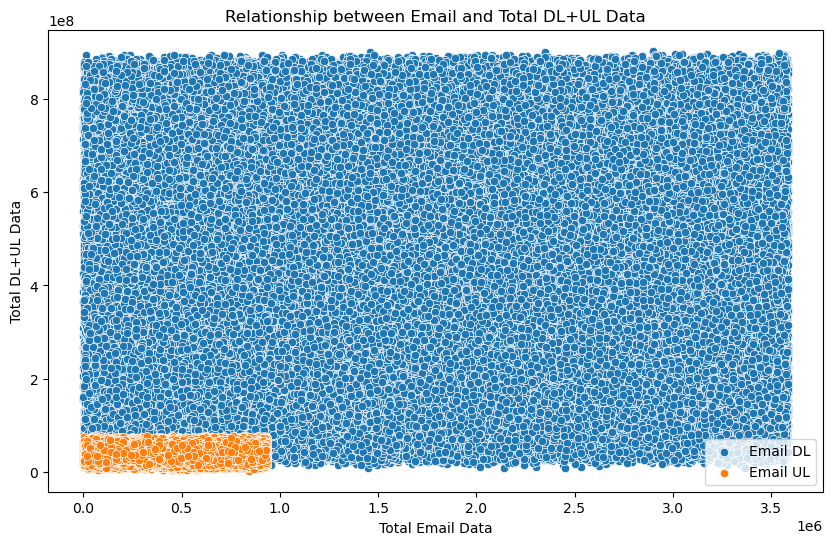

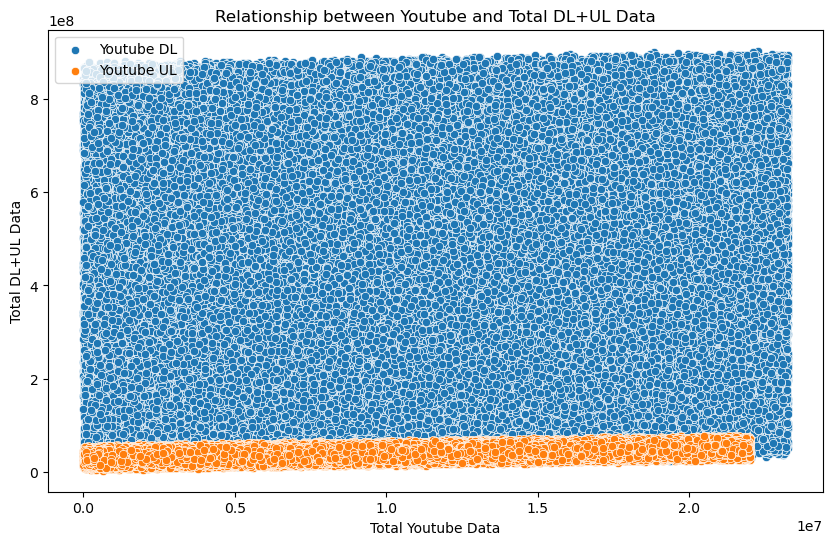

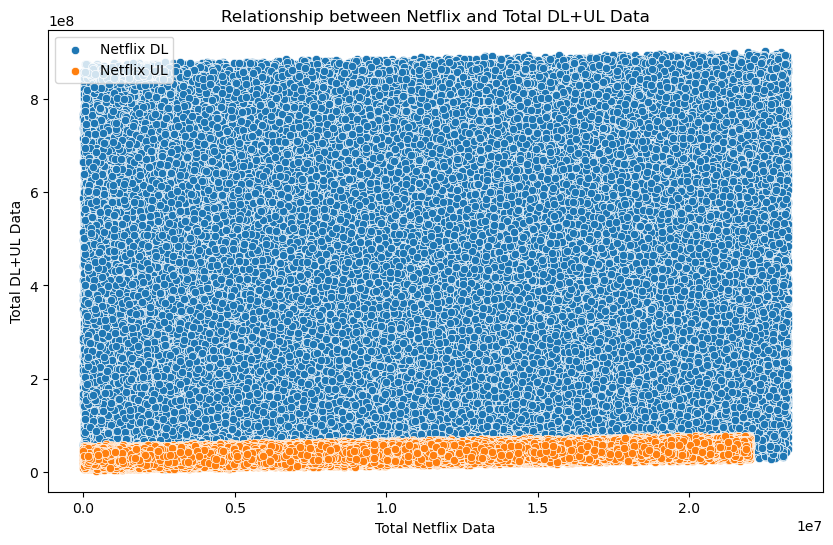

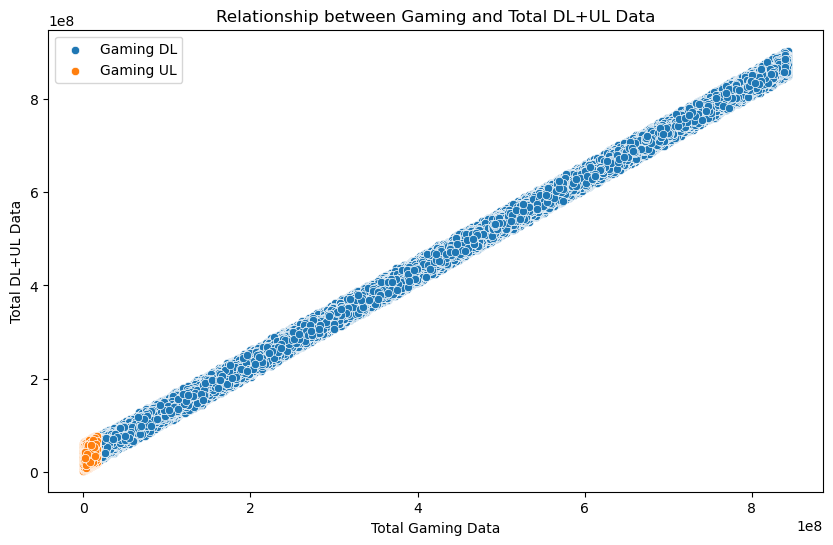

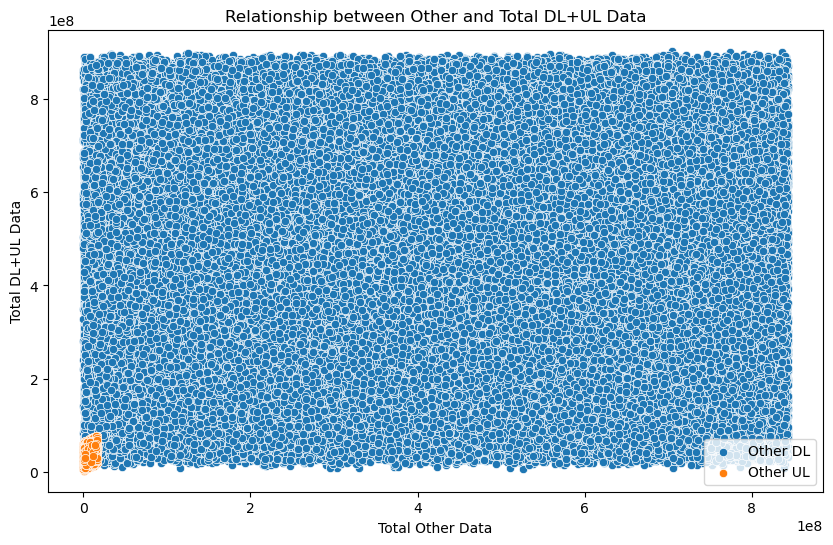

In [139]:
# Task 2.2. Bullet 5 ...

# Bivariate Analysis
# Explore the relationship between each application and total DL+UL data
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

for app in applications:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{app} DL (Bytes)', y='Total DL (Bytes)', data=df_clean, label=f'{app} DL')
    sns.scatterplot(x=f'{app} UL (Bytes)', y='Total UL (Bytes)', data=df_clean, label=f'{app} UL')
    plt.title(f'Relationship between {app} and Total DL+UL Data')
    plt.xlabel(f'Total {app} Data')
    plt.ylabel('Total DL+UL Data')
    plt.legend()
    plt.show()

In [127]:
# Task 2.2 Bullet 6

all_app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
             'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)','Netflix DL (Bytes)', 
             'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 
             'Total UL (Bytes)', 'Total DL (Bytes)']
#columns_2 = ['Total DL (Bytes)', 'Social Media DL (Bytes)','Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
#           'Netflix DL (Bytes)','Gaming DL (Bytes)', 'Other DL (Bytes)']

In [140]:
# Convert 'Dur. (ms)' to seconds for easier interpretation
df_clean['Dur. (ms)'] = df_clean['Dur. (ms)'] / 1000

# Compute total duration and total data (DL+UL) per user
user_summary = df_clean.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Compute deciles based on total duration
user_summary['Duration Decile'] = pd.qcut(user_summary['Dur. (ms)'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=False, duplicates='drop')

# Compute total data (DL+UL) per decile class
data_per_decile = user_summary.groupby('Duration Decile').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Display the result
data_per_decile

Duration Decile  Total UL (Bytes)  Total DL (Bytes)
0                0      9.547430e+11      1.059394e+13
1                1      1.044428e+12      1.152621e+13
2                2      9.605178e+11      1.060947e+13
3                3      1.157958e+12      1.281675e+13
4                4      2.006209e+12      2.216321e+13

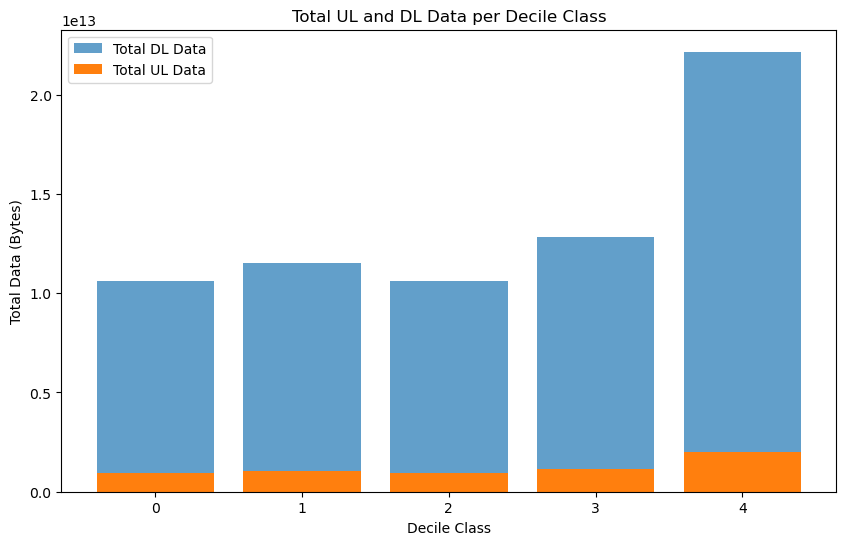

In [143]:
plt.figure(figsize=(10, 6))

plt.bar(data_per_decile['Duration Decile'], data_per_decile['Total DL (Bytes)'], label='Total DL Data', alpha=0.7)
plt.bar(data_per_decile['Duration Decile'], data_per_decile['Total UL (Bytes)'], label='Total UL Data')

plt.xlabel('Decile Class')
plt.ylabel('Total Data (Bytes)')
plt.title('Total UL and DL Data per Decile Class')
plt.legend()
plt.show()

In [130]:
# Correlation Analysis 
# Task 2.2 Bullet 7
selected_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Subset the DataFrame with the selected columns
selected_data = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

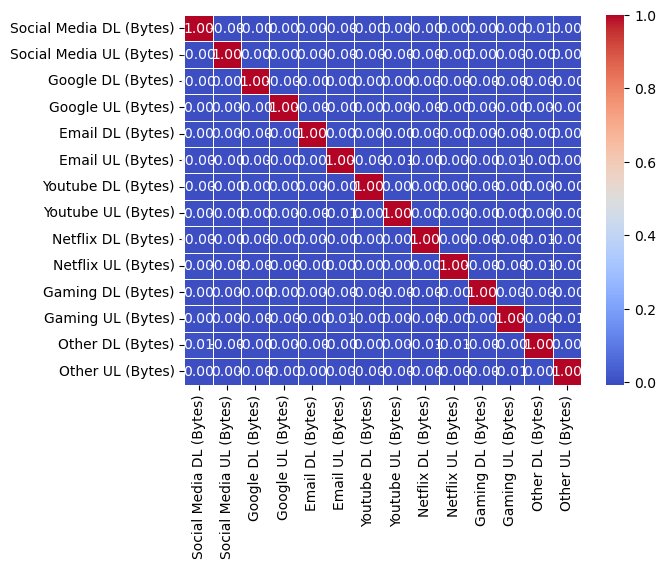

In [132]:
# Correlation Analysis 
# Task 2.2 Bullet 7 ... 

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

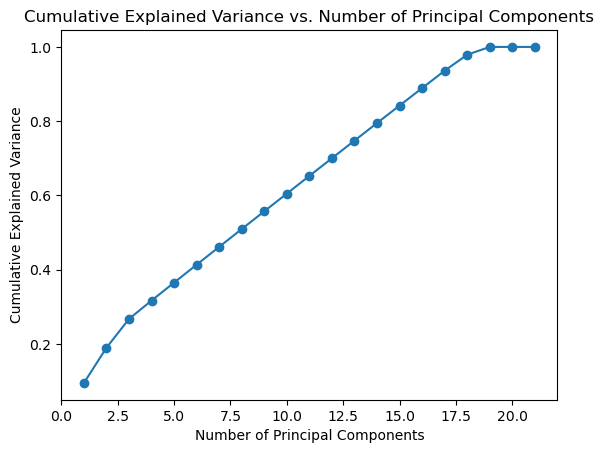

In [150]:
# Task 2.2 Bullet 8
# Dimensionality Reduction using Principal Component Analysis (PCA) technique

# Select relevant columns for PCA
selected_columns_PCA = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                    'Other DL (Bytes)', 'Other UL (Bytes)',
                    'Total UL (Bytes)', 'Total DL (Bytes)']

# Extract the selected columns
data_for_pca = df_clean[selected_columns_PCA]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Task 3 - User Engagement analysis

In [267]:
# Assuming 'MSISDN/Number' is the column containing user identifiers
# and 'Start' and 'End' columns represent the start and end times of each session
sessions_df = df_clean[['MSISDN/Number', 'Start', 'End']]

# Convert 'Start' and 'End' columns to datetime format
sessions_df['Start'] = pd.to_datetime(sessions_df['Start'])
sessions_df['End'] = pd.to_datetime(sessions_df['End'])

# Calculate session duration in minutes
sessions_df['Session_Duration_Minutes'] = (sessions_df['End'] - sessions_df['Start']).dt.total_seconds() / 60

# Calculate the number of sessions for each user
session_frequency = sessions_df.groupby('MSISDN/Number')['Start'].count().reset_index()
session_frequency.columns = ['MSISDN/Number', 'Session_Frequency']

# Display the result
session_frequency.sort_values(by="Session_Frequency", ascending=False).head(10)

MSISDN/Number  Session_Frequency
89695   3.373171e+10              23471
0       3.360301e+10                827
12920   3.362632e+10                 18
5831    3.361489e+10                 17
12574   3.362578e+10                 17
36446   3.365973e+10                 16
75757   3.367588e+10                 15
64512   3.366716e+10                 13
13388   3.362708e+10                 12
673     3.360452e+10                 12

        MSISDN/Number  Session_Duration_Minutes
11       3.366447e+10                   14831.0
12       3.360329e+10                   14180.0
13       3.365922e+10                   13542.0
14       3.365922e+10                   12965.0
15       3.375376e+10                   13008.0
...               ...                       ...
149996   3.365069e+10                    1354.0
149997   3.366345e+10                    1633.0
149998   3.362189e+10                    1638.0
149999   3.361962e+10                    1632.0
150000   3.361962e+10                   -1884.0

[149990 rows x 2 columns]


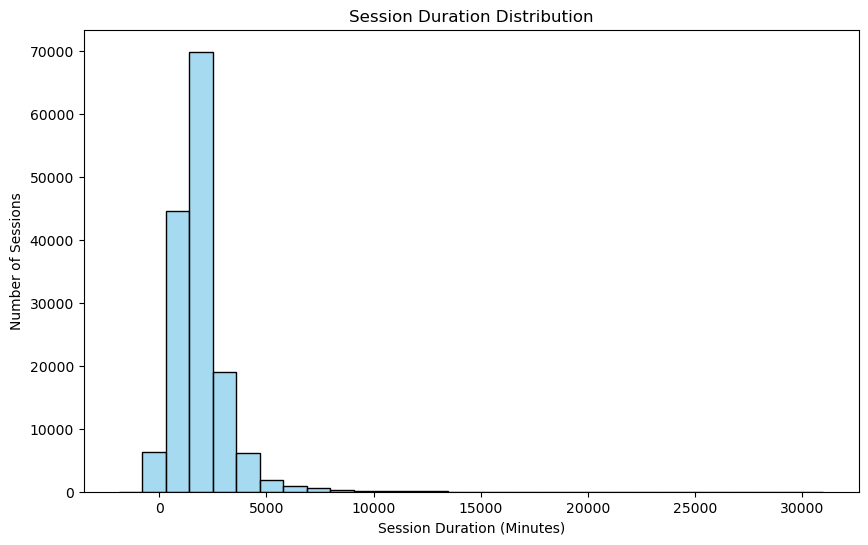

In [269]:
sessions_df = df[['MSISDN/Number', 'Start', 'End']]

# Convert 'Start' and 'End' columns to datetime format
sessions_df['Start'] = pd.to_datetime(sessions_df['Start'])
sessions_df['End'] = pd.to_datetime(sessions_df['End'])

# Calculate session duration in minutes
sessions_df['Session_Duration_Minutes'] = (sessions_df['End'] - sessions_df['Start']).dt.total_seconds() / 60

# Display the session duration for each session
print(sessions_df[['MSISDN/Number', 'Session_Duration_Minutes']])

# Create a histogram to visualize the distribution of session durations
plt.figure(figsize=(10, 6))
sns.histplot(sessions_df['Session_Duration_Minutes'], bins=30, kde=False, color='skyblue')
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (Minutes)')
plt.ylabel('Number of Sessions')
plt.show()

        MSISDN/Number  Total_Traffic_Bytes
11       3.366447e+10          568809782.0
12       3.360329e+10          848798988.0
13       3.365922e+10          625189407.0
14       3.365922e+10          331143097.0
15       3.375376e+10          101047021.0
...               ...                  ...
149996   3.365069e+10          631804110.0
149997   3.366345e+10          705783925.0
149998   3.362189e+10          627698629.0
149999   3.361962e+10          401522016.0
150000   3.361962e+10          401522016.0

[149990 rows x 2 columns]


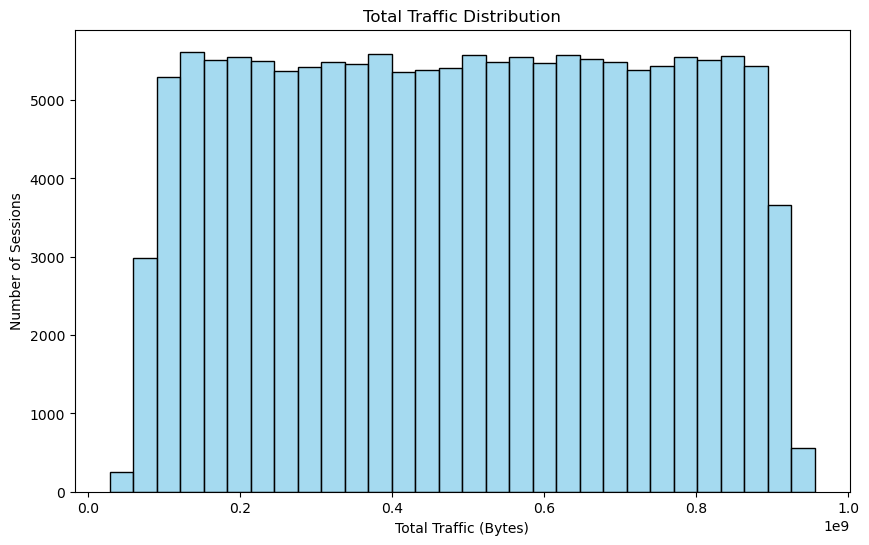

In [271]:
sessions_df = df[['MSISDN/Number', 'Total DL (Bytes)', 'Total UL (Bytes)']]

# Calculate the total traffic (download + upload) for each session
sessions_df['Total_Traffic_Bytes'] = sessions_df['Total DL (Bytes)'] + sessions_df['Total UL (Bytes)']

# Display the total traffic for each session
print(sessions_df[['MSISDN/Number', 'Total_Traffic_Bytes']])

# Create a histogram to visualize the distribution of total traffic
plt.figure(figsize=(10, 6))
sns.histplot(sessions_df['Total_Traffic_Bytes'], bins=30, kde=False, color='skyblue')
plt.title('Total Traffic Distribution')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Number of Sessions')
plt.show()

# Task 4 - Experience Analytics

In [234]:
df_clean_2 = df.drop(['Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean_2.shape

(149990, 53)

In [235]:
df_clean_2.isnull().sum().sort_values(ascending=False)/150001*100

Bearer Id                                   0.0
Activity Duration UL (ms)                   0.0
Handset Manufacturer                        0.0
Handset Type                                0.0
Nb of sec with 125000B < Vol DL             0.0
Nb of sec with 1250B < Vol UL < 6250B       0.0
Nb of sec with 31250B < Vol DL < 125000B    0.0
Nb of sec with 6250B < Vol DL < 31250B      0.0
Nb of sec with Vol DL < 6250B               0.0
Nb of sec with Vol UL < 1250B               0.0
Social Media DL (Bytes)                     0.0
Social Media UL (Bytes)                     0.0
Google DL (Bytes)                           0.0
Google UL (Bytes)                           0.0
Email DL (Bytes)                            0.0
Email UL (Bytes)                            0.0
Youtube DL (Bytes)                          0.0
Youtube UL (Bytes)                          0.0
Netflix DL (Bytes)                          0.0
Netflix UL (Bytes)                          0.0
Gaming DL (Bytes)                       

In [251]:
# Select relevant columns
network_data = df[['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                   'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Handset Type', 'Avg Bearer TP DL (kbps)',
                   'Avg Bearer TP UL (kbps)']]

# Aggregate network parameters per customer
user_aggregated_network = network_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': lambda x: x.mean(),
    'TCP UL Retrans. Vol (Bytes)': lambda x: x.mean(),
    'Avg RTT DL (ms)': lambda x: x.mean(),
    'Avg RTT UL (ms)': lambda x: x.mean(),
    'Handset Type': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Avg Bearer TP DL (kbps)': lambda x: x.mean(),
    'Avg Bearer TP UL (kbps)': lambda x: x.mean()
})

# Rename columns for clarity
user_aggregated_network = user_aggregated_network.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg_TCP_Retrans_DL',
    'TCP UL Retrans. Vol (Bytes)': 'Avg_TCP_Retrans_UL',
    'Avg RTT DL (ms)': 'Avg_RTT_DL',
    'Avg RTT UL (ms)': 'Avg_RTT_UL',
    'Avg Bearer TP DL (kbps)': 'Avg_Throughput_DL',
    'Avg Bearer TP UL (kbps)': 'Avg_Throughput_UL'
})

# Handle missing values by filling with mean or mode
network_data['Avg_TCP_Retrans_DL'] = user_aggregated_network['Avg_TCP_Retrans_DL'].fillna(user_aggregated_network['Avg_TCP_Retrans_DL'].mean())
network_data['Avg_TCP_Retrans_UL'] = user_aggregated_network['Avg_TCP_Retrans_UL'].fillna(user_aggregated_network['Avg_TCP_Retrans_UL'].mean())
network_data['Avg_RTT_DL'] = user_aggregated_network['Avg_RTT_DL'].fillna(user_aggregated_network['Avg_RTT_DL'].mean())
network_data['Avg_RTT_UL'] = user_aggregated_network['Avg_RTT_UL'].fillna(user_aggregated_network['Avg_RTT_UL'].mean())
network_data['Handset Type'] = user_aggregated_network['Handset Type'].fillna(user_aggregated_network['Handset Type'].mode().iloc[0] if not user_aggregated_network['Handset Type'].mode().empty else None)
network_data['Avg_Throughput_DL'] = user_aggregated_network['Avg_Throughput_DL'].fillna(user_aggregated_network['Avg_Throughput_DL'].mean())
network_data['Avg_Throughput_UL'] = user_aggregated_network['Avg_Throughput_UL'].fillna(user_aggregated_network['Avg_Throughput_UL'].mean())

In [252]:
# Display the aggregated network parameters per user
user_aggregated_network.head()

Avg_TCP_Retrans_DL  Avg_TCP_Retrans_UL  Avg_RTT_DL  Avg_RTT_UL  \
MSISDN/Number                                                                   
3.360100e+10             716618.0             13074.0        46.0         0.0   
3.360100e+10              14449.0              1294.0        30.0         1.0   
3.360100e+10            3863726.0            203415.0        53.0         6.0   
3.360101e+10               1066.0              3990.0        69.0        15.0   
3.360101e+10            5289058.5             19246.0        57.0         2.5   

                                 Handset Type  Avg_Throughput_DL  \
MSISDN/Number                                                      
3.360100e+10   Huawei P20 Lite Huawei Nova 3E               37.0   
3.360100e+10           Apple iPhone 7 (A1778)               48.0   
3.360100e+10                        undefined               48.0   
3.360101e+10          Apple iPhone 5S (A1457)              204.0   
3.360101e+10          Apple iPhone Se (A1723)            20197.5   

               Avg_Throughput_UL  
MSISDN/Number                     
3.360100e+10                39.0  
3.360100e+10                51.0  
3.360100e+10                49.0  
3.360101e+10                44.0  
3.360101e+10              8224.5

In [247]:

# Replace column names as needed
tcp_column = 'Avg Bearer TP DL (kbps)'
rtt_column = 'Avg RTT DL (ms)'
throughput_column = 'TCP DL Retrans. Vol (Bytes)'

# Compute and list top values
top_tcp = df_clean_t4.nlargest(10, tcp_column)[[tcp_column]]
top_rtt = df_clean_t4.nlargest(10, rtt_column)[[rtt_column]]
top_throughput = df_clean_t4.nlargest(10, throughput_column)[[throughput_column]]

# Compute and list bottom values
bottom_tcp = df_clean_t4.nsmallest(10, tcp_column)[[tcp_column]]
bottom_rtt = df_clean_t4.nsmallest(10, rtt_column)[[rtt_column]]
bottom_throughput = df_clean_t4.nsmallest(10, throughput_column)[[throughput_column]]

# Compute and list most frequent values
most_frequent_tcp = df_clean_t4[tcp_column].value_counts().nlargest(10).reset_index()
most_frequent_rtt = df_clean_t4[rtt_column].value_counts().nlargest(10).reset_index()
most_frequent_throughput = df_clean_t4[throughput_column].value_counts().nlargest(10).reset_index()

# Rename the columns
most_frequent_tcp.columns = [tcp_column, 'Frequency']
most_frequent_rtt.columns = [rtt_column, 'Frequency']
most_frequent_throughput.columns = [throughput_column, 'Frequency']

# Display the results
print("Top TCP Values:")
print(top_tcp)

print("\nBottom TCP Values:")
print(bottom_tcp)

print("\nMost Frequent TCP Values:")
print(most_frequent_tcp)

print("\nTop RTT Values:")
print(top_rtt)

print("\nBottom RTT Values:")
print(bottom_rtt)

print("\nMost Frequent RTT Values:")
print(most_frequent_rtt)

print("\nTop Throughput Values:")
print(top_throughput)

print("\nBottom Throughput Values:")
print(bottom_throughput)

print("\nMost Frequent Throughput Values:")
print(most_frequent_throughput)


Top TCP Values:
        Avg Bearer TP DL (kbps)
120890                 378160.0
141262                 299257.0
143670                 299002.0
149617                 276040.0
92193                  269362.0
117791                 266332.0
115850                 265440.0
89577                  264448.0
116565                 263047.0
41576                  254253.0

Bottom TCP Values:
      Avg Bearer TP DL (kbps)
13                        0.0
149                       0.0
364                       0.0
546                       0.0
618                       0.0
679                       0.0
756                       0.0
809                       0.0
893                       0.0
1185                      0.0

Most Frequent TCP Values:
   Avg Bearer TP DL (kbps)  Frequency
0                     23.0       7323
1                     43.0       4352
2                     44.0       4185
3                      6.0       3980
4                     22.0       2866
5                     48.0 

In [257]:
# Task 4.3 
# Select relevant columns
throughput_tcp_data = df[['Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                          'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

# Group by handset type and calculate the mean of average throughput and TCP retransmission
average_throughput_per_handset = throughput_tcp_data.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean'
})
average_throughput_per_handset

Avg Bearer TP DL (kbps)  \
Handset Type                                                                  
A-Link Telecom I. Cubot A5                                     23184.000000   
A-Link Telecom I. Cubot Note Plus                               6527.000000   
A-Link Telecom I. Cubot Note S                                  8515.000000   
A-Link Telecom I. Cubot Nova                                   55667.000000   
A-Link Telecom I. Cubot Power                                  69126.000000   
...                                                                     ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...                44.500000   
Zyxel Communicat. Lte7460                                      39741.000000   
Zyxel Communicat. Sbg3600                                      82818.000000   
Zyxel Communicat. Zyxel Wah7706                                 1263.000000   
undefined                                                       9189.566626   

                                                    Avg Bearer TP UL (kbps)  \
Handset Type                                                                  
A-Link Telecom I. Cubot A5                                       326.000000   
A-Link Telecom I. Cubot Note Plus                                172.000000   
A-Link Telecom I. Cubot Note S                                   422.000000   
A-Link Telecom I. Cubot Nova                                     550.000000   
A-Link Telecom I. Cubot Power                                    342.000000   
...                                                                     ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...                13.500000   
Zyxel Communicat. Lte7460                                      22215.000000   
Zyxel Communicat. Sbg3600                                      14533.000000   
Zyxel Communicat. Zyxel Wah7706                                  910.000000   
undefined                                                        875.043415   

                                                    TCP DL Retrans. Vol (Bytes)  \
Handset Type                                                                      
A-Link Telecom I. Cubot A5                                         7.718470e+05   
A-Link Telecom I. Cubot Note Plus                                  6.023490e+05   
A-Link Telecom I. Cubot Note S                                     4.134448e+07   
A-Link Telecom I. Cubot Nova                                       1.358400e+05   
A-Link Telecom I. Cubot Power                                      7.799000e+03   
...                                                                         ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...                 6.392452e+06   
Zyxel Communicat. Lte7460                                          2.384303e+07   
Zyxel Communicat. Sbg3600                                          5.020084e+07   
Zyxel Communicat. Zyxel Wah7706                                    1.160000e+02   
undefined                                                          9.775406e+06   

                                                    TCP UL Retrans. Vol (Bytes)  
Handset Type                                                                     
A-Link Telecom I. Cubot A5                                         2.128000e+04  
A-Link Telecom I. Cubot Note Plus                                  1.386400e+04  
A-Link Telecom I. Cubot Note S                                     6.725200e+04  
A-Link Telecom I. Cubot Nova                                       1.330000e+03  
A-Link Telecom I. Cubot Power                                      2.420000e+02  
...                                                                         ...  
Zte Zte Blade C2 Smartphone Android By Sfr Star...                 4.534000e+04  
Zyxel Communicat. Lte7460                                          1.743352e+07  
Zyxel Communicat. Sbg3600                                          3.286101e+06  
Zyxel Communic

In [287]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [291]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [305]:
df_clean.dropna(inplace=True)

In [ ]:
# Task 4. 4

# Subset of columns for clustering
experience_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                      'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                      'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                      'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                      'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)']

# Extract relevant columns
experience_data = df_clean[experience_columns]

# Standardize the data
scaler = StandardScaler()
experience_data_scaled = scaler.fit_transform(experience_data)

# Apply k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(experience_data_scaled)

# Describe each cluster
cluster_description = df_clean.groupby('Cluster')[experience_columns].mean()

print("Cluster Descriptions:")
print(cluster_description)

# Task 5 - Satisfaction Analysis

5.1

In [ ]:
# Select relevant columns for engagement and experience analysis
engagement_experience_metrics = df_clean[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                                    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

# Fill any missing values with the mean
engagement_experience_metrics = engagement_experience_metrics.fillna(engagement_experience_metrics.mean())

# Standardize the data
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(engagement_experience_metrics)

# Assign engagement and experience scores
engagement_scores = pairwise_distances_argmin_min(scaled_metrics, kmeans.cluster_centers_[0].reshape(1, -1))[1]
experience_scores = pairwise_distances_argmin_min(scaled_metrics, cluster_centers.iloc[cluster_centers['Avg Bearer TP DL (kbps)'].idxmin()].values.reshape(1, -1))[1]

# Add scores to the DataFrame
df_clean['Engagement Score'] = engagement_scores
df_clean['Experience Score'] = experience_scores

# Display the DataFrame with scores
print(df_clean[['MSISDN/Number', 'Engagement Score', 'Experience Score']])

5.2

In [ ]:
# Calculate the average satisfaction score
df_clean['Satisfaction Score'] = df_clean[['Engagement Score', 'Experience Score']].mean(axis=1)

# Display the top 10 satisfied customers
top_satisfied_customers = df_clean.sort_values(by='Satisfaction Score', ascending=False).head(10)
print("Top 10 Satisfied Customers:")
print(top_satisfied_customers[['MSISDN/Number', 'Satisfaction Score']])

5.3 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with relevant features and Satisfaction Score

# Select features for the regression model
features = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
            'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']

# Fill any missing values with the mean
df_clean[features] = df_clean[features].fillna(df_clean[features].mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean[features], df_clean['Satisfaction Score'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

5.4

In [ ]:
# Select relevant columns for clustering
engagement_experience_scores = df_clean[['Engagement Score', 'Experience Score']]

# Fill any missing values with the mean
engagement_experience_scores = engagement_experience_scores.fillna(engagement_experience_scores.mean())

# Standardize the data
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(engagement_experience_scores)

# Perform k-means clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df_clean['Cluster_2'] = kmeans_2.fit_predict(scaled_scores)

5.5

In [ ]:
# Group by the Cluster_2 column and calculate the average satisfaction and experience scores
cluster_aggregated_scores = df_clean.groupby('Cluster_2').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()